# Introduction
In this exercise, some Principal Component Analysis (PCA) will be performed. We'll use the __Mercedes- Benz Greener Manufacturing__ dataset: https://www.kaggle.com/competitions/mercedes-benz-greener-manufacturing/data

At first, EDA will be applied to the data. Then, the PCA will be performed and the number of components chosen. After that, we will the selected number of components and find which features of the original data have the an absolute correlation of at least 0,75.

In [1]:
# Import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Read the datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print(train_df.shape, test_df.shape)

(4209, 378) (4209, 377)


# EDA
In this chapter, some EDA will be performed to better understand the data. We'll do that by:
- Dealing with null values
- Check distribution of categorical columns
- Remove columns with only 1 unique value (aka 0 variation)
- Create dummy variables

The EDA will be done for both the train and the test set.

## Dealing with null values
To find out if we have null values, we'll print that using .isna() method.

In [3]:
print(f"Number of null values in train set {train_df.isna().sum().sum()}")
print(f"Number of null values in test set {test_df.isna().sum().sum()}")

Number of null values in train set 0
Number of null values in test set 0


### Findings
Both datasets have no null values. So we don't have to deal with that.

## Check distribution of categorical columns
In this chapter, the distribution of the categorical columns will be checked. This will be done to see if all categorical features are well distributed.

### Train set

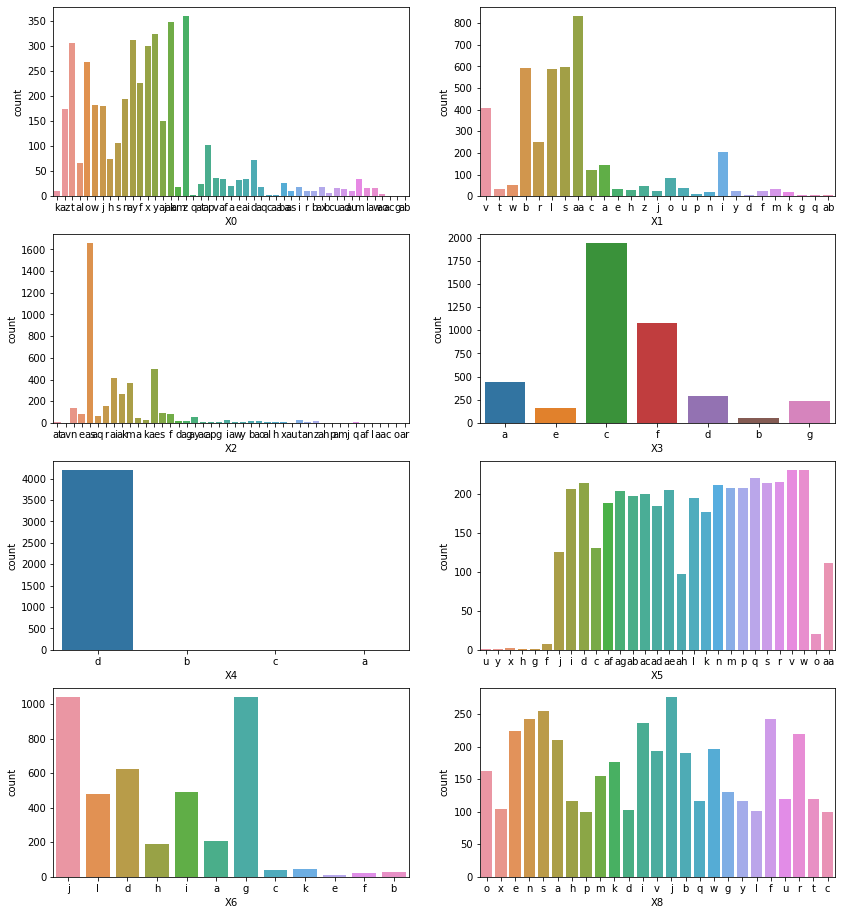

In [4]:
# Extract the column with dtype 'object': cat_cols_train
cat_cols_train = [x for x in train_df.columns if train_df[x].dtype == 'object']

# Creating the figure and axes for subplotting
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (14, 16))

# Use for loop to show distribution of categorical columns
for col, ax in zip(cat_cols_train, axes.flat):
    sns.countplot(data = train_df, x = str(col), ax = ax)
plt.show()

### Test set

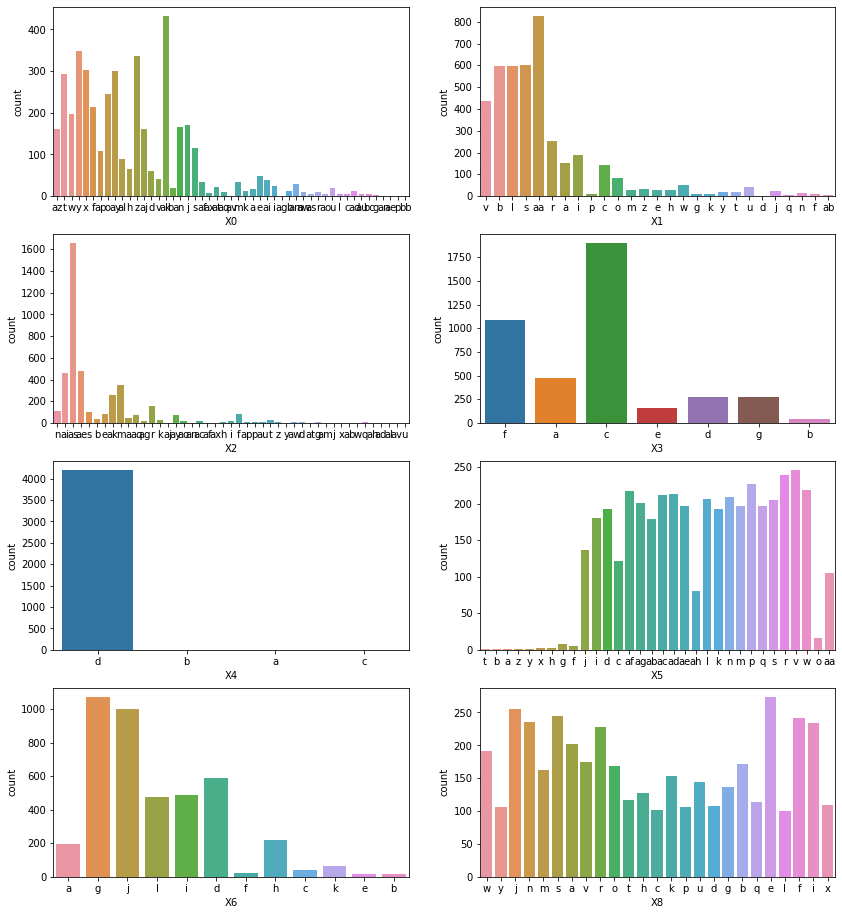

In [5]:
# Extract the column with dtype 'object': cat_cols_train
cat_cols_test = [x for x in test_df.columns if test_df[x].dtype == 'object']

# Creating the figure and axes for subplotting
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (14, 16))

# Use for loop to show distribution of categorical columns
for col, ax in zip(cat_cols_test, axes.flat):
    sns.countplot(data = test_df, x = str(col), ax = ax)
plt.show()

### Findings
Column X4 is almost a constant variable, for both train and test data. That's why the columns will be removed.

In [6]:
# Remove X4 from train and test data
train_df = train_df.drop('X4', axis = 1)
test_df = test_df.drop('X4', axis = 1)

print(train_df.shape, test_df.shape)

(4209, 377) (4209, 376)


## Remove columns with only 1 unique value
Columns that only have 1 unique value, is more of a constant variable that only makes the data more uncessary complex. That's why they will be removed.

In [7]:
# Remove columns that only have 1 unique value from train and test data
train_df = train_df.drop(train_df.columns[train_df.nunique() == 1], axis=1)
test_df = test_df.drop(test_df.columns[test_df.nunique() == 1], axis=1)

print(train_df.shape, test_df.shape)

(4209, 365) (4209, 371)


## Create dummy variables

In [8]:
# Extract object column names from train and test data
# This has to be done again because X4 was removed
cat_cols_train = [x for x in train_df.columns if train_df[x].dtype == 'object']
cat_cols_test = [x for x in test_df.columns if test_df[x].dtype == 'object']

# Add dummy variables
train_df = pd.get_dummies(train_df, drop_first = True, columns = cat_cols_train)
test_df = pd.get_dummies(test_df, drop_first = True, columns = cat_cols_test)

print(train_df.shape, test_df.shape)

(4209, 542) (4209, 554)


# PCA
In this chapter, Principal Component Analysis (PCA) will be performed on both the train and test set. PCA is a dimensionality reduction algorithm that converts a set of observations of possibly correlated variables into a set of linearly uncorrelated variables.

At first, the number of components for the PCA will be chosen based on the explained variance ratio. This will be done by creating a pipeline that has a scalar and PCA object in it.
Then, based on that number of components chosen, the original features will be selected which have an absolute correlation of at least 0,75 to the components.

In [9]:
# Remove id and y target from train and test
train_clean = train_df.drop(['ID', 'y'], axis = 1)
test_clean = test_df.drop('ID', axis = 1)

# Create the pipeline for the scaler and the PCA
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components = 20))])

## Selecting number of components
In this chapter, the number of components will be selected. This will be done by plotting the explained variance ratio of the components. After the plotting is done, we'll select the number of components using the elbow method.

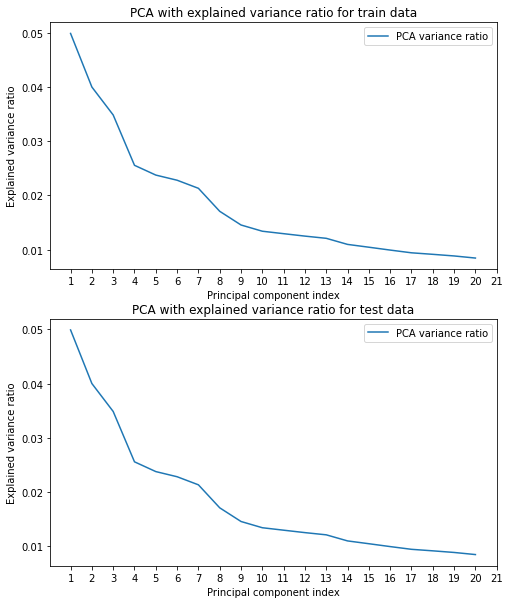

In [10]:
# Create list of fitted datasets
data = [pipe.fit(train_clean), pipe.fit(test_clean)]

# Setting the xticks with labels
# Add 1 value to the labels since the variance ratio is 0-based indexed
xticks = [x for x in range(0, 21)]
xticks_labels = [x for x in range(1, 22)]

# Set titles
titles = ["PCA with explained variance ratio for train data",
        "PCA with explained variance ratio for test data"]

# Create figure and axes for subplotting
fig, axes = plt.subplots(nrows = 2, figsize = (8, 10))

# Create two subplots using for looping
for ax, pca, title in zip(axes.flat, data, titles):
    ax.plot(pca['reducer'].explained_variance_ratio_, label = "PCA variance ratio")
    ax.set_xticks(xticks, labels = xticks_labels)
    ax.set_xlabel('Principal component index')
    ax.set_ylabel('Explained variance ratio')
    ax.set_title(title)
    ax.legend()
    
plt.show()

### Findings
Based on the elbow method, we see a relatively sharp angle at 4. This goes for both train and test set. That's why the number of selected components is 4.

## Performing PCA

In [11]:
# Create two pipelines for train and test set: pipe_chosen_train & pipe_chosen_test
pipe_chosen_train = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components = 4))])

pipe_chosen_test = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components = 4))])

# Fit and transform both datasets: p_com_train & p_com_test
p_com_train = pipe_chosen_train.fit_transform(train_clean)
p_com_test = pipe_chosen_test.fit_transform(test_clean)


# Create a dataframe that calculates each correlation for each feature
# of the original df for each component
# Do this for both the train and test set
pca_train = pd.DataFrame(data=[[abs(np.corrcoef(train_clean[c],p_com_train[:,n]))[1,0] 
               for n in range(pipe_chosen_train['reducer'].n_components_)] for c in train_clean],
             columns=[x for x in range(pipe_chosen_train['reducer'].n_components_)], index = train_clean.columns)

pca_test = pd.DataFrame(data=[[abs(np.corrcoef(test_clean[c],p_com_test[:,n]))[1,0] 
               for n in range(pipe_chosen_test['reducer'].n_components_)] for c in test_clean],
             columns=[x for x in range(pipe_chosen_test['reducer'].n_components_)], index = test_clean.columns)

pca_train.head()

,0,1,2,3
X10,0.034155,0.002992,0.045189,0.080162
X12,0.060478,0.042399,0.087866,0.054997
X13,0.028824,0.013825,0.136654,0.183077
X14,0.229511,0.010842,0.557115,0.390519
X15,0.016322,0.010716,0.015480,0.005676


### Results
In this paragraph, the features with an absolute correlation of 0.75 with the components will be shown.

In [12]:
# Set two empty lists
features_train = []
features_test = []

# Iterate through each column
for i in range(pca_train.shape[1]):
    # Get indexes from rows that have a value above 0.75 for each column
    train_feat = (pca_train.loc[pca_train.loc[:, i] > 0.75, i].index.to_list())
    test_feat = pca_test.loc[pca_test.loc[:, i] > 0.75, i].index.to_list()
    
    # Loop through the two lists to append them to the lists
    for x, y in zip(train_feat, test_feat):
        features_train.append(x)
        features_test.append(y)

# Extract unique features
features_train = np.unique(features_train)
features_test = np.unique(features_test)

# Print the results
print(f"For the train set, we have the following number of features {len(features_train)}")
print(f"For the test set, we have the following number of features {len(features_test)}\n")

print(f"Train set features selected {features_train}")
print(f"Test set features selected {features_test}")

For the train set, we have the following number of features 35
For the test set, we have the following number of features 35

Train set features selected ['X0_ap' 'X101' 'X111' 'X113' 'X126' 'X128' 'X130' 'X134' 'X136' 'X147'
 'X162' 'X166' 'X170' 'X179' 'X189' 'X198' 'X222' 'X232' 'X238' 'X263'
 'X264' 'X265' 'X272' 'X276' 'X279' 'X29' 'X2_s' 'X328' 'X348' 'X48' 'X54'
 'X66' 'X76' 'X80' 'X98']
Test set features selected ['X0_ap' 'X0_az' 'X101' 'X111' 'X113' 'X126' 'X128' 'X130' 'X134' 'X136'
 'X147' 'X162' 'X170' 'X179' 'X189' 'X198' 'X222' 'X232' 'X238' 'X263'
 'X264' 'X265' 'X272' 'X276' 'X279' 'X29' 'X2_s' 'X328' 'X348' 'X48' 'X54'
 'X66' 'X75' 'X76' 'X80']


### Findings
Ultimately, we have 35 features after the PCA is performed.

# Regression algorithm: RandomForestRegressor
For practicing, a regression algorithm will be performed using the default paramters for RandomForestRegressor.

In [13]:
# Instantiate random forest regressor and empty scaler
rfg = RandomForestRegressor()
scaler = StandardScaler()
# Train on the train set using the features from before.
train = pd.DataFrame(scaler.fit_transform(train_clean[features_train]), columns = features_train)
test = pd.DataFrame(scaler.fit_transform(test_clean[features_test]), columns = features_test)

# Add target column for training
train['y'] = train_df.loc[:, 'y']

# Create training and test sets
X_train = train.drop('y', axis = 1)
y_train = train['y']

# Fit the model
rfg.fit(X_train, y_train)

# Create the prediction and use that along with the ID's to show as output
pred = rfg.predict(test)

output = pd.DataFrame(pred, columns = ['output'], index = test_df['ID'])

output.head()

,output
ID,
1,81.739683
2,101.045038
3,77.703884
4,81.739683
5,101.045038
